# 0. Content:

**TABLE of CONTENT:**  
[1. Capstone project introduction:](#1.-Capstone-project-introduction:)  
[2. Data wrangling:](#2.-Data-wrangling:)  
  - [2.1. Data collection:](#2.1.-Data-collection:)
  - [2.2. Data organization:](#2.2.-Data-organization:)
  - [2.3. Data definition:](#2.3.-Data-definition:)  
        - [2.3.1. General information:](#2.3.1.-General-information:)  
        - [2.3.2. Null values inspection:](#2.3.2.-Null-values-inspection:)  
        - [2.3.3. Time data:](#2.3.3.-Time-data:)  
        - [2.3.4. Categorical data:](#2.3.4.-Categorical-data:)  
        - [2.3.5. Columns description:](#2.3.5.-Columns-description:)  
        - [2.3.6. Redundant columns:](#2.3.6.-Redundant-columns:)  
        - [2.3.7. Duplicated rows:](#2.3.7.-Duplicated-rows:)  
        - [2.3.8. Ranges:](#2.3.8.-Ranges:)
  - [2.4. Data cleaning:](#2.4.-Data-cleaning:)  
        - [2.4.1. Missing Values:](#2.4.1.-Missing-Values:)  
        - [2.4.2. Time data format:](#2.4.2.-Time-data-format:)  
        - [2.4.3. Categorical data:](#2.4.3.-Categorical-data:)  
        - [2.4.4. Outliers detection:](#2.4.4.-Outliers-detection:)  
        - [2.4.5. Redundant columns:](#2.4.4.-Redundant-columns:)  
        - [2.4.6. Duplicated rows:](#2.4.5.-Duplicated-rows:)  
        - [2.4.7. Ranges:](#2.4.6.-Ranges:)  
        - [2.4.8. Save dataframe to .csv:](#2.4.7.-Save-dataframe-to-.csv:)  

# 1. Capstone project introduction:

**Project Overview: Building Permit Applications Analysis**

**Description**  
This project investigates trends in building permit applications to understand construction activity over time. It helps identify seasonal patterns, economic cycles, and permits distribution by type and geography.

**Problem Statement**  
"What trends and patterns can we observe in building permit applications over time, and what do they reveal about construction activity?"

**Dataset** 
- Title: San Francisco Building Permits.  
- Source: https://www.kaggle.com/datasets/aparnashastry/building-permit-applications-data?resource=download  
- Contents: The fields include:
  - permit_type  
  - application_date  
  - estimated_cost  
  - status  
  - zipcode  
  - contractor

# 2. Data wrangling:

## 2.1. Data collection:

In [8]:
#!pip install thefuzz[speedup]

In [9]:
import pandas as pd
from thefuzz import fuzz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Access to the .csv data set raw data lying in the 18.6_capstone_two online Github repository.

In [11]:
# Github .csv raw daat access url link:
csv_url = r"https://raw.githubusercontent.com/BenoitLoze1977/18.6_capstone_two/master/data/raw/Building_Permits.csv"

In [12]:
# .csv reading to dataframe:
sf_df = pd.read_csv(csv_url)
sf_df.head()

C:\Users\Benoit Loze\AppData\Local\Temp\ipykernel_12484\1614387760.py:2: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_df = pd.read_csv(csv_url)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


## 2.2. Data organization:

**Cookiecutter Data Science** is a project template designed to standardize how data science projects are organized:

- It helps start a project faster and on solid foundations by providing a predefined directory structure.
- It makes it easier for project stakeholders to quickly understand the project layout, reducing confusion.
- It clearly separates raw and processed data to improve reproducibility and workflow clarity.

The folder structure was created locally using the `ccds` command in the command prompt (after installing the `cookiecutter-data-science` package via `pip`).

The folder was then initialized as a local Git repository using the `git init` command.

Finally, the local repository was published and pushed to GitHub.

## 2.3. Data definition:

### 2.3.1. General information:

In [17]:
# Total number of rows & columns:
sf_df.shape

(198900, 43)

In [18]:
# Column names, null data and data types:
sf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

In [19]:
sf_df_headers = list(sf_df.columns)
sf_df_headers

['Permit Number',
 'Permit Type',
 'Permit Type Definition',
 'Permit Creation Date',
 'Block',
 'Lot',
 'Street Number',
 'Street Number Suffix',
 'Street Name',
 'Street Suffix',
 'Unit',
 'Unit Suffix',
 'Description',
 'Current Status',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'Completed Date',
 'First Construction Document Date',
 'Structural Notification',
 'Number of Existing Stories',
 'Number of Proposed Stories',
 'Voluntary Soft-Story Retrofit',
 'Fire Only Permit',
 'Permit Expiration Date',
 'Estimated Cost',
 'Revised Cost',
 'Existing Use',
 'Existing Units',
 'Proposed Use',
 'Proposed Units',
 'Plansets',
 'TIDF Compliance',
 'Existing Construction Type',
 'Existing Construction Type Description',
 'Proposed Construction Type',
 'Proposed Construction Type Description',
 'Site Permit',
 'Supervisor District',
 'Neighborhoods - Analysis Boundaries',
 'Zipcode',
 'Location',
 'Record ID']

### 2.3.2. Null values inspection:

In [21]:
# Info dataframe:
sf_df_info = pd.DataFrame({
    'column': sf_df.columns,
    'non_null_count': sf_df.notnull().sum().values,
    'null_count': sf_df.isnull().sum().values,
    'dtype': sf_df.dtypes.values
})

sf_df_info

,column,non_null_count,null_count,dtype
0,Permit Number,198900,0,object
1,Permit Type,198900,0,int64
2,Permit Type Definition,198900,0,object
3,Permit Creation Date,198900,0,object
4,Block,198900,0,object
5,Lot,198900,0,object
6,Street Number,198900,0,int64
7,Street Number Suffix,2216,196684,object
8,Street Name,198900,0,object
9,Street Suffix,196132,2768,object


In [22]:
# Column with Null values beyond 50% threshold:
threshold = round(sf_df.shape[0] * 0.5)
condition_null = sf_df_info["null_count"] > threshold
column_null_drop = sf_df_info.loc[condition_null, ["column", "null_count"]]
column_null_drop

,column,null_count
7,Street Number Suffix,196684
10,Unit,169421
11,Unit Suffix,196939
17,Completed Date,101709
19,Structural Notification,191978
22,Voluntary Soft-Story Retrofit,198865
23,Fire Only Permit,180073
32,TIDF Compliance,198898
37,Site Permit,193541


In [23]:
# Columns for potential drop due to too many missing values:
null_drop = list(column_null_drop["column"])
null_drop

['Street Number Suffix',
 'Unit',
 'Unit Suffix',
 'Completed Date',
 'Structural Notification',
 'Voluntary Soft-Story Retrofit',
 'Fire Only Permit',
 'TIDF Compliance',
 'Site Permit']

If the rows with null values in a feature represent less than 5% of the total records, those rows can be dropped.

In [25]:
# 5% rule:
five_percent = sf_df.shape[0] * 0.05
five_percent

9945.0

In [26]:
condition_five_percent = (sf_df_info["null_count"] < five_percent) & (sf_df_info["null_count"] != 0)
columns_fivepercent = sf_df_info.loc[condition_five_percent, ["column", "null_count"]]
columns_fivepercent

,column,null_count
9,Street Suffix,2768
12,Description,290
26,Revised Cost,6066
38,Supervisor District,1717
39,Neighborhoods - Analysis Boundaries,1725
40,Zipcode,1716
41,Location,1700


In [27]:
fivepercent_drop = list(columns_fivepercent["column"])
fivepercent_drop

['Street Suffix',
 'Description',
 'Revised Cost',
 'Supervisor District',
 'Neighborhoods - Analysis Boundaries',
 'Zipcode',
 'Location']

### 2.3.3. Time data:

In [29]:
condition_date = sf_df_info["column"].str.lower().str.contains("date")

In [30]:
condition_date = sf_df_info["column"].str.lower().str.contains("date")
column_date_change = sf_df_info.loc[condition_date, ['column', 'dtype']]
column_date_change

,column,dtype
3,Permit Creation Date,object
14,Current Status Date,object
15,Filed Date,object
16,Issued Date,object
17,Completed Date,object
18,First Construction Document Date,object
24,Permit Expiration Date,object


In [31]:
# column for potential format change to date format:
date_change = list(column_date_change["column"])
date_change

['Permit Creation Date',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'Completed Date',
 'First Construction Document Date',
 'Permit Expiration Date']

### 2.3.4. Categorical data:

Indentification of the potential categorical collumns. The purpose is to detect features with few unique values.  
Features with few unique values could be categorical despite being numeric (hot encoded).

In [34]:
for col in sf_df.columns:
    print(f"{col} - unique: {sf_df[col].nunique()} - dtype: {sf_df[col].dtype}")

Permit Number - unique: 181495 - dtype: object
Permit Type - unique: 8 - dtype: int64
Permit Type Definition - unique: 8 - dtype: object
Permit Creation Date - unique: 1291 - dtype: object
Block - unique: 4896 - dtype: object
Lot - unique: 1055 - dtype: object
Street Number - unique: 5099 - dtype: int64
Street Number Suffix - unique: 18 - dtype: object
Street Name - unique: 1704 - dtype: object
Street Suffix - unique: 21 - dtype: object
Unit - unique: 660 - dtype: float64
Unit Suffix - unique: 164 - dtype: object
Description - unique: 134272 - dtype: object
Current Status - unique: 14 - dtype: object
Current Status Date - unique: 1307 - dtype: object
Filed Date - unique: 1288 - dtype: object
Issued Date - unique: 1289 - dtype: object
Completed Date - unique: 1300 - dtype: object
First Construction Document Date - unique: 1288 - dtype: object
Structural Notification - unique: 1 - dtype: object
Number of Existing Stories - unique: 64 - dtype: float64
Number of Proposed Stories - unique: 

In [35]:
# Exploration of Stories and Uses features:
columns_to_check = ["Number of Existing Stories", "Number of Proposed Stories", "Existing Use", "Proposed Use"]

for col in columns_to_check:
    print(f"\nColumn: {col}")
    
    # Drop missing values
    value_counts = sf_df[col].value_counts()
    
    # Calculate percentage
    percentages = (value_counts / len(sf_df)) * 100
    
    # Combine into a DataFrame
    summary = pd.DataFrame({
        'Value': value_counts.index,
        'Frequency': value_counts.values,
        'Percentage': percentages.round(2).values
    })

    print(summary)


Column: Number of Existing Stories
    Value  Frequency  Percentage
0     2.0      52767       26.53
1     3.0      45740       23.00
2     4.0      16055        8.07
3     1.0       8793        4.42
4     5.0       3767        1.89
..    ...        ...         ...
59   49.0          3        0.00
60    2.5          2        0.00
61   62.0          2        0.00
62   78.0          1        0.00
63    1.5          1        0.00

[64 rows x 3 columns]

Column: Number of Proposed Stories
    Value  Frequency  Percentage
0     2.0      50991       25.64
1     3.0      46802       23.53
2     4.0      17593        8.85
3     1.0       7893        3.97
4     5.0       4044        2.03
..    ...        ...         ...
59   47.0          3        0.00
60   49.0          3        0.00
61    2.5          2        0.00
62   78.0          1        0.00
63    1.5          1        0.00

[64 rows x 3 columns]

Column: Existing Use
                   Value  Frequency  Percentage
0      1 family dwel

Let us fix a threshold at 100 to filter out the potential categorical features.

In [37]:
# Function defintion as operation repeated for numeric and text categories:
def categories(df, *dtype):

    # Constant categorical threshold:
    CATEGORICAL = 100

    # empty list:
    result = []

    # selection:
    for col in df.columns:
        if df[col].nunique() <= CATEGORICAL:
            if str(df[col].dtype) in dtype:
                tup = (col, df[col].nunique(), df[col].dtype)
                result.append(tup)

    return result
        

In [38]:
categories_numeric = categories(sf_df, 'int64', 'float64')
categories_numeric

[('Permit Type', 8, dtype('int64')),
 ('Number of Existing Stories', 64, dtype('float64')),
 ('Number of Proposed Stories', 64, dtype('float64')),
 ('Plansets', 8, dtype('float64')),
 ('Existing Construction Type', 5, dtype('float64')),
 ('Proposed Construction Type', 5, dtype('float64')),
 ('Supervisor District', 11, dtype('float64')),
 ('Zipcode', 27, dtype('float64'))]

In [39]:
categories_text = categories(sf_df, 'object')
categories_text

[('Permit Type Definition', 8, dtype('O')),
 ('Street Number Suffix', 18, dtype('O')),
 ('Street Suffix', 21, dtype('O')),
 ('Current Status', 14, dtype('O')),
 ('Structural Notification', 1, dtype('O')),
 ('Voluntary Soft-Story Retrofit', 1, dtype('O')),
 ('Fire Only Permit', 1, dtype('O')),
 ('Existing Use', 93, dtype('O')),
 ('Proposed Use', 94, dtype('O')),
 ('TIDF Compliance', 2, dtype('O')),
 ('Existing Construction Type Description', 5, dtype('O')),
 ('Proposed Construction Type Description', 5, dtype('O')),
 ('Site Permit', 1, dtype('O')),
 ('Neighborhoods - Analysis Boundaries', 41, dtype('O'))]

### 2.3.5. Columns description:

The description of the columns content is directly available in a provided annex .xls file.

In [42]:
excel_url = "https://raw.githubusercontent.com/BenoitLoze1977/18.6_capstone_two/master/data/raw/DataDictionaryBuildingPermit.xlsx"

In [43]:
description = pd.read_excel(excel_url, engine='openpyxl')
description

,Sl No,Column name,Description
0,1,Permit Number,Number assigned while filing
1,2,Permit Type,Type of the permit represented numerically.
2,3,Permit Type Definition,"Description of the Permit type, for example\n ..."
3,4,Permit Creation Date,"Date on which permit created, later than \nor ..."
4,5,Block,Related to address
5,6,Lot,Related to address
6,7,Street Number,Related to address
7,8,Street Number Suffix,Related to address
8,9,Street Name,Related to address
9,10,Street Name Suffix,Related to address


### 2.3.6. Redundant columns:

Some descriptive columns, which describe already one-hot encoded variables, can be dropped from the main dataset and stored in a separate lookup table. 
They can be linked back to the main sf_df dataset via a shared primary key based on the one-hot code.  
 - Permit type definition.
 - Existing construction type description.
 - Proposed construction type description.

### 2.3.7. Duplicated rows:

**Complete duplicates:**

In [48]:
complete_dups = sf_df[sf_df.duplicated(keep=False)]
complete_dups

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


**Partial duplicates:**

In [50]:
subset_cols = ['Permit Number', 'Street Number', 'Street Name', 'Zipcode', 'Permit Type', 
               'Proposed Use', 'Issued Date', 'Current Status', 'Completed Date', 'Estimated Cost']
partial_dups = sf_df[sf_df.duplicated(subset=subset_cols, keep=False)]
partial_dups

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
18,201707283165,8,otc alterations permit,07/28/2017,0472,042,1307,NaN,Bay,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,Marina,94123.0,"(37.8035183252307, -122.42863180996076)",1472277302360
64,201711154040,3,additions alterations or repairs,11/15/2017,6969,001,5050,NaN,Mission,St,...,NaN,NaN,NaN,NaN,NaN,11.0,Outer Mission,94112.0,"(37.71772263199437, -122.44060092814006)",1487232215636
77,M864527,8,otc alterations permit,12/08/2017,0642,087,1700,NaN,California,St,...,NaN,NaN,NaN,NaN,NaN,2.0,Pacific Heights,94109.0,"(37.79055541147386, -122.4230298567197)",148986077468
84,M869807,8,otc alterations permit,12/22/2017,0474,036,1111,NaN,Bay,St,...,NaN,NaN,NaN,NaN,NaN,2.0,Marina,94123.0,"(37.80383760408627, -122.425481726898)",149161771342
133,201706018123,8,otc alterations permit,06/01/2017,3606,085,240,NaN,Liberty,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Castro/Upper Market,94114.0,"(37.757615513382525, -122.42667063025485)",1465253161623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198631,201802221985,8,otc alterations permit,02/22/2018,3637,088,1170,NaN,South Van Ness,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Mission,94110.0,"(37.75440724840337, -122.4168111100299)",1498083486988
198654,201802221908,8,otc alterations permit,02/22/2018,0311,008,88,NaN,Kearny,St,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Financial District/South Beach,94104.0,"(37.78859990589228, -122.40331829649287)",1498106495355
198770,201802232097,8,otc alterations permit,02/23/2018,3117,049A,425,NaN,Monterey,Bl,...,5.0,wood frame (5),5.0,wood frame (5),NaN,7.0,West of Twin Peaks,94112.0,"(37.73135521046475, -122.44488173732859)",1498224152794
198771,201802232097,8,otc alterations permit,02/23/2018,3117,049A,425,A,Monterey,Bl,...,5.0,wood frame (5),5.0,wood frame (5),NaN,7.0,West of Twin Peaks,94112.0,"(37.73135521046475, -122.44488173732859)",1498225390708


In [51]:
partial_dups_group = partial_dups.groupby(subset_cols).size().reset_index(name='Count')
partial_dups_group_sorted = partial_dups_group.sort_values(by='Count', ascending=False).head(10)
partial_dups_group_sorted

,Permit Number,Street Number,Street Name,Zipcode,Permit Type,Proposed Use,Issued Date,Current Status,Completed Date,Estimated Cost,Count
393,201602179758,750,Kirkwood,94124.0,3,apartments,06/22/2016,complete,01/10/2017,22682.0,8
394,201602179758,780,Kirkwood,94124.0,3,apartments,06/22/2016,complete,01/10/2017,22682.0,8
395,201602179758,790,Kirkwood,94124.0,3,apartments,06/22/2016,complete,01/10/2017,22682.0,8
602,201707061162,260,Clara,94107.0,8,apartments,07/31/2017,complete,01/09/2018,1.0,8
639,201711284975,1865,California,94109.0,8,apartments,11/28/2017,complete,12/27/2017,18000.0,7
442,201605127298,5,Burnett Ave North,94131.0,8,apartments,05/12/2016,complete,06/13/2016,17780.0,6
618,201709087418,738,06th,94118.0,8,apartments,09/11/2017,complete,01/16/2018,110000.0,6
446,201605177576,155,Hancock,94114.0,8,apartments,05/17/2016,complete,10/03/2016,39000.0,5
512,201610059572,2240,Green,94123.0,8,apartments,11/01/2016,complete,07/24/2017,129890.0,5
432,201604296147,50,Raymond,94134.0,8,public assmbly other,05/19/2017,complete,10/31/2017,167200.0,5


### 2.3.8. Ranges:

Several features could be summarized into ranges, which could help to understand the data distribution.  
 - Estimated Cost.  
 - Number of Existing Stories.  
 - Number of proposed Stories.  
 - Existing Units.  
 - Proposed Units.  
 - Filed Date.  
 - Zipcode.  

## 2.4. Data cleaning:

### 2.4.1. Missing Values:

Drop of the features with more than 50% missing data.

In [57]:
sf_df.drop(columns=null_drop, inplace=True)
sf_df.shape

(198900, 34)

In [58]:
# Info dataframe:
sf_df_info = pd.DataFrame({
    'column': sf_df.columns,
    'non_null_count': sf_df.notnull().sum().values,
    'null_count': sf_df.isnull().sum().values,
    'dtype': sf_df.dtypes.values
})

sf_df_info

,column,non_null_count,null_count,dtype
0,Permit Number,198900,0,object
1,Permit Type,198900,0,int64
2,Permit Type Definition,198900,0,object
3,Permit Creation Date,198900,0,object
4,Block,198900,0,object
5,Lot,198900,0,object
6,Street Number,198900,0,int64
7,Street Name,198900,0,object
8,Street Suffix,196132,2768,object
9,Description,198610,290,object


Drop of the rows with missing data for less than 5% of its feature.

In [60]:
sf_df.dropna(subset=fivepercent_drop, inplace=True)

In [61]:
sf_df.shape

(188286, 34)

In [62]:
# Info dataframe:
sf_df_info = pd.DataFrame({
    'column': sf_df.columns,
    'non_null_count': sf_df.notnull().sum().values,
    'null_count': sf_df.isnull().sum().values,
    'dtype': sf_df.dtypes.values
})

sf_df_info

,column,non_null_count,null_count,dtype
0,Permit Number,188286,0,object
1,Permit Type,188286,0,int64
2,Permit Type Definition,188286,0,object
3,Permit Creation Date,188286,0,object
4,Block,188286,0,object
5,Lot,188286,0,object
6,Street Number,188286,0,int64
7,Street Name,188286,0,object
8,Street Suffix,188286,0,object
9,Description,188286,0,object


Date and categorical data need their format to be corrected first. However, numeric data missing values can be imputed:  
    - Number of Existing Stories  --> mean.  
    - Number of Proposed Stories  --> mean.  
    - Existing Units  --> mean.  
    - Proposed Units  --> mean.  
    - Estimated Cost  --> median (data can be heavily skewed).

In [64]:
sf_df.fillna({
    "Number of Existing Stories": sf_df["Number of Existing Stories"].mean(),
    "Number of Proposed Stories": sf_df["Number of Proposed Stories"].mean(),
    "Existing Units": sf_df["Existing Units"].mean(),
    "Proposed Units": sf_df["Proposed Units"].mean(),
    "Estimated Cost": sf_df["Estimated Cost"].median()
}, inplace=True)

In [65]:
# Info dataframe:
sf_df_info = pd.DataFrame({
    'column': sf_df.columns,
    'non_null_count': sf_df.notnull().sum().values,
    'null_count': sf_df.isnull().sum().values,
    'dtype': sf_df.dtypes.values
})

sf_df_info

,column,non_null_count,null_count,dtype
0,Permit Number,188286,0,object
1,Permit Type,188286,0,int64
2,Permit Type Definition,188286,0,object
3,Permit Creation Date,188286,0,object
4,Block,188286,0,object
5,Lot,188286,0,object
6,Street Number,188286,0,int64
7,Street Name,188286,0,object
8,Street Suffix,188286,0,object
9,Description,188286,0,object


### 2.4.2. Time data format:

The dropped date-related column is first removed from the list of columns to be processed as datetime data.  
The remaining datetime columns are then correctly parsed using pd.to_datetime() to ensure consistent format.  
  
In general, imputing missing datetime values requires caution, particularly if the analysis involves detecting temporal patterns or cycles.  
Simple mean or median imputation is not appropriate here, as these methods ignore chronological order and may introduce unrealistic or logically inconsistent dates.  
Forward filling, on the other hand, preserves temporal sequence and makes more sense — **but only if the data is first sorted**.  
Regarding logical relationships, columns such as `"Permit Creation Date"` and `"Filed Date"` are strongly tied to `"Permit Number"`. Therefore, grouping by `"Permit Number"` and sorting by each date column prior to forward filling might be a sound approach for imputing missing values in these columns.  

In [68]:
date_change.remove('Completed Date')
date_change

['Permit Creation Date',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'First Construction Document Date',
 'Permit Expiration Date']

In [69]:
sf_df[date_change]

,Permit Creation Date,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Permit Expiration Date
0,05/06/2015,12/21/2017,05/06/2015,11/09/2015,11/09/2015,11/03/2016
1,04/19/2016,08/03/2017,04/19/2016,08/03/2017,08/03/2017,12/03/2017
3,11/07/2016,07/24/2017,11/07/2016,07/18/2017,07/18/2017,07/13/2018
4,11/28/2016,12/01/2017,11/28/2016,12/01/2017,11/20/2017,12/01/2018
5,06/14/2017,07/06/2017,06/14/2017,07/06/2017,07/06/2017,07/01/2018
...,...,...,...,...,...,...
198881,02/23/2018,02/23/2018,02/23/2018,02/23/2018,02/23/2018,NaN
198882,02/23/2018,02/23/2018,02/23/2018,02/23/2018,02/23/2018,06/23/2018
198883,02/23/2018,02/23/2018,02/23/2018,02/23/2018,02/23/2018,NaN
198884,02/23/2018,02/23/2018,02/23/2018,NaN,NaN,NaN


In [70]:
for col in date_change:
    sf_df[col] = pd.to_datetime(sf_df[col], infer_datetime_format=True, errors="coerce")

C:\Users\Benoit Loze\AppData\Local\Temp\ipykernel_12484\87832271.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sf_df[col] = pd.to_datetime(sf_df[col], infer_datetime_format=True, errors="coerce")
C:\Users\Benoit Loze\AppData\Local\Temp\ipykernel_12484\87832271.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sf_df[col] = pd.to_datetime(sf_df[col], infer_datetime_format=True, errors="coerce")
C:\Users\Benoit Loze\AppData\Local\Temp\ipykernel_12484\87832271.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in 

In [71]:
# Info dataframe:
sf_df_info = pd.DataFrame({
    'column': sf_df.columns,
    'non_null_count': sf_df.notnull().sum().values,
    'null_count': sf_df.isnull().sum().values,
    'dtype': sf_df.dtypes.values
})

sf_df_info

,column,non_null_count,null_count,dtype
0,Permit Number,188286,0,object
1,Permit Type,188286,0,int64
2,Permit Type Definition,188286,0,object
3,Permit Creation Date,188286,0,datetime64[ns]
4,Block,188286,0,object
5,Lot,188286,0,object
6,Street Number,188286,0,int64
7,Street Name,188286,0,object
8,Street Suffix,188286,0,object
9,Description,188286,0,object


In [72]:
# Control for ISO format:
sf_df[date_change]

,Permit Creation Date,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Permit Expiration Date
0,2015-05-06,2017-12-21,2015-05-06,2015-11-09,2015-11-09,2016-11-03
1,2016-04-19,2017-08-03,2016-04-19,2017-08-03,2017-08-03,2017-12-03
3,2016-11-07,2017-07-24,2016-11-07,2017-07-18,2017-07-18,2018-07-13
4,2016-11-28,2017-12-01,2016-11-28,2017-12-01,2017-11-20,2018-12-01
5,2017-06-14,2017-07-06,2017-06-14,2017-07-06,2017-07-06,2018-07-01
...,...,...,...,...,...,...
198881,2018-02-23,2018-02-23,2018-02-23,2018-02-23,2018-02-23,NaT
198882,2018-02-23,2018-02-23,2018-02-23,2018-02-23,2018-02-23,2018-06-23
198883,2018-02-23,2018-02-23,2018-02-23,2018-02-23,2018-02-23,NaT
198884,2018-02-23,2018-02-23,2018-02-23,NaT,NaT,NaT


In [73]:
date_columns = ["Permit Creation Date", "Filed Date"]

# Group by 'Permit Number' and forward-fill missing values for each date column
for col in date_columns:
    sf_df[col] = (sf_df.sort_values(['Permit Number', col]).groupby('Permit Number')[col].ffill())

In [74]:
sf_df_info = pd.DataFrame({
    'column': sf_df.columns,
    'non_null_count': sf_df.notnull().sum().values,
    'null_count': sf_df.isnull().sum().values,
    'dtype': sf_df.dtypes.values
})

sf_df_info

,column,non_null_count,null_count,dtype
0,Permit Number,188286,0,object
1,Permit Type,188286,0,int64
2,Permit Type Definition,188286,0,object
3,Permit Creation Date,188286,0,datetime64[ns]
4,Block,188286,0,object
5,Lot,188286,0,object
6,Street Number,188286,0,int64
7,Street Name,188286,0,object
8,Street Suffix,188286,0,object
9,Description,188286,0,object


### 2.4.3. Categorical data:

**Step 1**  - filtering & detection of fuzzy duplicated values:

In [77]:
# List of columns for numeric categories:
categories_numeric

[('Permit Type', 8, dtype('int64')),
 ('Number of Existing Stories', 64, dtype('float64')),
 ('Number of Proposed Stories', 64, dtype('float64')),
 ('Plansets', 8, dtype('float64')),
 ('Existing Construction Type', 5, dtype('float64')),
 ('Proposed Construction Type', 5, dtype('float64')),
 ('Supervisor District', 11, dtype('float64')),
 ('Zipcode', 27, dtype('float64'))]

In [78]:
# List updating following columns dropping:
categories_numeric = [tup for tup in categories_numeric if tup[0] in sf_df.columns]
categories_numeric

[('Permit Type', 8, dtype('int64')),
 ('Number of Existing Stories', 64, dtype('float64')),
 ('Number of Proposed Stories', 64, dtype('float64')),
 ('Plansets', 8, dtype('float64')),
 ('Existing Construction Type', 5, dtype('float64')),
 ('Proposed Construction Type', 5, dtype('float64')),
 ('Supervisor District', 11, dtype('float64')),
 ('Zipcode', 27, dtype('float64'))]

In [79]:
# "Zipcode" will treated as range values to determine district, regions, etc.
# same will happen for "Number of Existing Stories" and "Number of Proposed Stories"
values_to_remove = ["Number of Existing Stories", "Number of Proposed Stories", "Zipcode"]
categories_numeric = [x for x in categories_numeric if x[0] not in values_to_remove]
categories_numeric

[('Permit Type', 8, dtype('int64')),
 ('Plansets', 8, dtype('float64')),
 ('Existing Construction Type', 5, dtype('float64')),
 ('Proposed Construction Type', 5, dtype('float64')),
 ('Supervisor District', 11, dtype('float64'))]

In [80]:
# List of columns for text categories:
categories_text

[('Permit Type Definition', 8, dtype('O')),
 ('Street Number Suffix', 18, dtype('O')),
 ('Street Suffix', 21, dtype('O')),
 ('Current Status', 14, dtype('O')),
 ('Structural Notification', 1, dtype('O')),
 ('Voluntary Soft-Story Retrofit', 1, dtype('O')),
 ('Fire Only Permit', 1, dtype('O')),
 ('Existing Use', 93, dtype('O')),
 ('Proposed Use', 94, dtype('O')),
 ('TIDF Compliance', 2, dtype('O')),
 ('Existing Construction Type Description', 5, dtype('O')),
 ('Proposed Construction Type Description', 5, dtype('O')),
 ('Site Permit', 1, dtype('O')),
 ('Neighborhoods - Analysis Boundaries', 41, dtype('O'))]

In [81]:
# List updating following columns dropping:
categories_text = [tup for tup in categories_text if tup[0] in sf_df.columns]
categories_text

[('Permit Type Definition', 8, dtype('O')),
 ('Street Suffix', 21, dtype('O')),
 ('Current Status', 14, dtype('O')),
 ('Existing Use', 93, dtype('O')),
 ('Proposed Use', 94, dtype('O')),
 ('Existing Construction Type Description', 5, dtype('O')),
 ('Proposed Construction Type Description', 5, dtype('O')),
 ('Neighborhoods - Analysis Boundaries', 41, dtype('O'))]

Detection of potential fuzzy duplicates.
No fuzzy duplicates detected.

In [83]:
# Detection of fuzzy duplicates in categorical values:
def detect_fuzzy_duplicates(df, text_col_stats, threshold=90):
    """
    Detect similar string values in categorical columns using fuzz.WRatio.

    Parameters:
    - df: pd.DataFrame
    - text_col_stats: list of tuples (col_name, unique_count, dtype)
    - threshold: int (fuzz.WRatio similarity threshold, default 90)

    Returns:
    - Dictionary: { column_name: [ (val1, val2, score), ... ] }
    """
    similar_values_dict = {}

    for col, _, _ in text_col_stats:
        values = df[col].dropna().astype(str).str.strip().unique().tolist()
        similar_pairs = []

        for i, val1 in enumerate(values):
            for j, val2 in enumerate(values):
                if i < j:
                    score = fuzz.WRatio(val1, val2)
                    if score >= threshold:
                        similar_pairs.append((val1, val2, score))

        if similar_pairs:
            similar_values_dict[col] = similar_pairs

    return similar_values_dict

In [84]:
categories_text_fuzzy = detect_fuzzy_duplicates(sf_df, categories_text)
categories_text_fuzzy

{'Permit Type Definition': [('new construction',
   'new construction wood frame',
   90)],
 'Existing Use': [('1 family dwelling', '2 family dwelling', 94),
  ('club', 'nite club', 90),
  ('warehouse,no frnitur', 'warehouse, furniture', 90),
  ('nursing home gt 6', 'nursing home lte 6', 91)],
 'Proposed Use': [('1 family dwelling', '2 family dwelling', 94),
  ('club', 'nite club', 90),
  ('warehouse,no frnitur', 'warehouse, furniture', 90),
  ('nursing home gt 6', 'nursing home lte 6', 91)],
 'Existing Construction Type Description': [('constr type 3',
   'constr type 1',
   92),
  ('constr type 3', 'constr type 4', 92),
  ('constr type 3', 'constr type 2', 92),
  ('constr type 1', 'constr type 4', 92),
  ('constr type 1', 'constr type 2', 92),
  ('constr type 4', 'constr type 2', 92)],
 'Proposed Construction Type Description': [('constr type 1',
   'constr type 3',
   92),
  ('constr type 1', 'constr type 4', 92),
  ('constr type 1', 'constr type 2', 92),
  ('constr type 3', 'constr

**Step 2** - conversion to category datatype:

In [86]:
categories = categories_numeric + categories_text
categories

[('Permit Type', 8, dtype('int64')),
 ('Plansets', 8, dtype('float64')),
 ('Existing Construction Type', 5, dtype('float64')),
 ('Proposed Construction Type', 5, dtype('float64')),
 ('Supervisor District', 11, dtype('float64')),
 ('Permit Type Definition', 8, dtype('O')),
 ('Street Suffix', 21, dtype('O')),
 ('Current Status', 14, dtype('O')),
 ('Existing Use', 93, dtype('O')),
 ('Proposed Use', 94, dtype('O')),
 ('Existing Construction Type Description', 5, dtype('O')),
 ('Proposed Construction Type Description', 5, dtype('O')),
 ('Neighborhoods - Analysis Boundaries', 41, dtype('O'))]

In [87]:
for tup in categories:
    sf_df[tup[0]] = sf_df[tup[0]].astype("category")

In [88]:
sf_df_info = pd.DataFrame({
    'column': sf_df.columns,
    'non_null_count': sf_df.notnull().sum().values,
    'null_count': sf_df.isnull().sum().values,
    'dtype': sf_df.dtypes.values
})

sf_df_info

,column,non_null_count,null_count,dtype
0,Permit Number,188286,0,object
1,Permit Type,188286,0,category
2,Permit Type Definition,188286,0,category
3,Permit Creation Date,188286,0,datetime64[ns]
4,Block,188286,0,object
5,Lot,188286,0,object
6,Street Number,188286,0,int64
7,Street Name,188286,0,object
8,Street Suffix,188286,0,category
9,Description,188286,0,object


**Step 3** - missing values imputation:

Missing values can break downstream encoding processes.  
Imputing missing values in categorical features using the mode (most frequent value) is often considered the best default strategy in many practical scenarios.  
Since the mode is the most frequent value, using it reinforces the existing distribution rather than skewing it.  

In [91]:
for col, _, _ in categories:
    mode_val = sf_df[col].mode(dropna=True)[0]  # [0] retrieves the first (most frequent) mode value from the Series.
    #print(mode_val)
    sf_df[col] = sf_df[col].fillna(mode_val)

In [92]:
sf_df_info = pd.DataFrame({
    'column': sf_df.columns,
    'non_null_count': sf_df.notnull().sum().values,
    'null_count': sf_df.isnull().sum().values,
    'dtype': sf_df.dtypes.values
})

sf_df_info

,column,non_null_count,null_count,dtype
0,Permit Number,188286,0,object
1,Permit Type,188286,0,category
2,Permit Type Definition,188286,0,category
3,Permit Creation Date,188286,0,datetime64[ns]
4,Block,188286,0,object
5,Lot,188286,0,object
6,Street Number,188286,0,int64
7,Street Name,188286,0,object
8,Street Suffix,188286,0,category
9,Description,188286,0,object


Update and check of the 5% percent threshold for missing values rows:

In [94]:
#Update of the 5% percent missing values for rows threshold:
missing_threshold = sf_df.shape[0] * 0.05
missing_threshold

9414.300000000001

In [95]:
condition3 = (sf_df_info["null_count"] < missing_threshold)&(sf_df_info["null_count"] != 0)

In [96]:
columns5 = list(sf_df_info.loc[condition3, "column"])
sf_df = sf_df.dropna(subset=columns5)

In [97]:
sf_df_info = pd.DataFrame({
    'column': sf_df.columns,
    'non_null_count': sf_df.notnull().sum().values,
    'null_count': sf_df.isnull().sum().values,
    'dtype': sf_df.dtypes.values
})

sf_df_info

,column,non_null_count,null_count,dtype
0,Permit Number,179623,0,object
1,Permit Type,179623,0,category
2,Permit Type Definition,179623,0,category
3,Permit Creation Date,179623,0,datetime64[ns]
4,Block,179623,0,object
5,Lot,179623,0,object
6,Street Number,179623,0,int64
7,Street Name,179623,0,object
8,Street Suffix,179623,0,category
9,Description,179623,0,object


**Step4** - apply hot encoding:

Before applying hot encoding and to avoid multicollinearity, the "Description" columns will be extracted to a separated dataframe.

In [100]:
# List of columns to separate
description_cols = [
    'Permit Type Definition',
    'Existing Construction Type Description',
    'Proposed Construction Type Description'
]

# Extract description columns to a new DataFrame
description_df = sf_df[description_cols].copy()

# Drop them from main dataset
sf_df.drop(columns=description_cols, inplace=True)

In [101]:
sf_df_info = pd.DataFrame({
    'column': sf_df.columns,
    'non_null_count': sf_df.notnull().sum().values,
    'null_count': sf_df.isnull().sum().values,
    'dtype': sf_df.dtypes.values
})

sf_df_info

,column,non_null_count,null_count,dtype
0,Permit Number,179623,0,object
1,Permit Type,179623,0,category
2,Permit Creation Date,179623,0,datetime64[ns]
3,Block,179623,0,object
4,Lot,179623,0,object
5,Street Number,179623,0,int64
6,Street Name,179623,0,object
7,Street Suffix,179623,0,category
8,Description,179623,0,object
9,Current Status,179623,0,category


### Hot encoding to be reserved for further stage!!

In [103]:
# cat_cols = sf_df.select_dtypes(include='category').columns

# # One-hot encode only the categorical columns.
# # 'drop_first=True' removes the first category level from each feature.
# # This is done to avoid multicollinearity, which can affect linear classification models.
# # such as logistic regression or linear SVM. It ensures that the encoded variables are independent.
# sf_df_dummies = pd.get_dummies(sf_df, columns=cat_cols, drop_first=True)

In [104]:
sf_df_dummies = sf_df

In [105]:
sf_df_dummies_info = pd.DataFrame({
    'column': sf_df_dummies.columns,
    'non_null_count': sf_df_dummies.notnull().sum().values,
    'null_count': sf_df_dummies.isnull().sum().values,
    'dtype': sf_df_dummies.dtypes.values
})

sf_df_dummies_info

,column,non_null_count,null_count,dtype
0,Permit Number,179623,0,object
1,Permit Type,179623,0,category
2,Permit Creation Date,179623,0,datetime64[ns]
3,Block,179623,0,object
4,Lot,179623,0,object
5,Street Number,179623,0,int64
6,Street Name,179623,0,object
7,Street Suffix,179623,0,category
8,Description,179623,0,object
9,Current Status,179623,0,category


In [106]:
sf_df_dummies.columns

Index(['Permit Number', 'Permit Type', 'Permit Creation Date', 'Block', 'Lot',
       'Street Number', 'Street Name', 'Street Suffix', 'Description',
       'Current Status', 'Current Status Date', 'Filed Date', 'Issued Date',
       'First Construction Document Date', 'Number of Existing Stories',
       'Number of Proposed Stories', 'Permit Expiration Date',
       'Estimated Cost', 'Revised Cost', 'Existing Use', 'Existing Units',
       'Proposed Use', 'Proposed Units', 'Plansets',
       'Existing Construction Type', 'Proposed Construction Type',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID'],
      dtype='object')

### 2.4.4. Outliers detection:

**Step 1** - Columns identification & selection:

In [109]:
numerical_columns = sf_df_dummies.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['Street Number',
 'Number of Existing Stories',
 'Number of Proposed Stories',
 'Estimated Cost',
 'Revised Cost',
 'Existing Units',
 'Proposed Units',
 'Zipcode',
 'Record ID']

In [110]:
not_concerned = ["Street Number", "Zipcode", "Record ID"]

In [111]:
numerical_columns = [x for x in numerical_columns if x not in not_concerned]
numerical_columns

['Number of Existing Stories',
 'Number of Proposed Stories',
 'Estimated Cost',
 'Revised Cost',
 'Existing Units',
 'Proposed Units']

**Step 2** - Box plots:

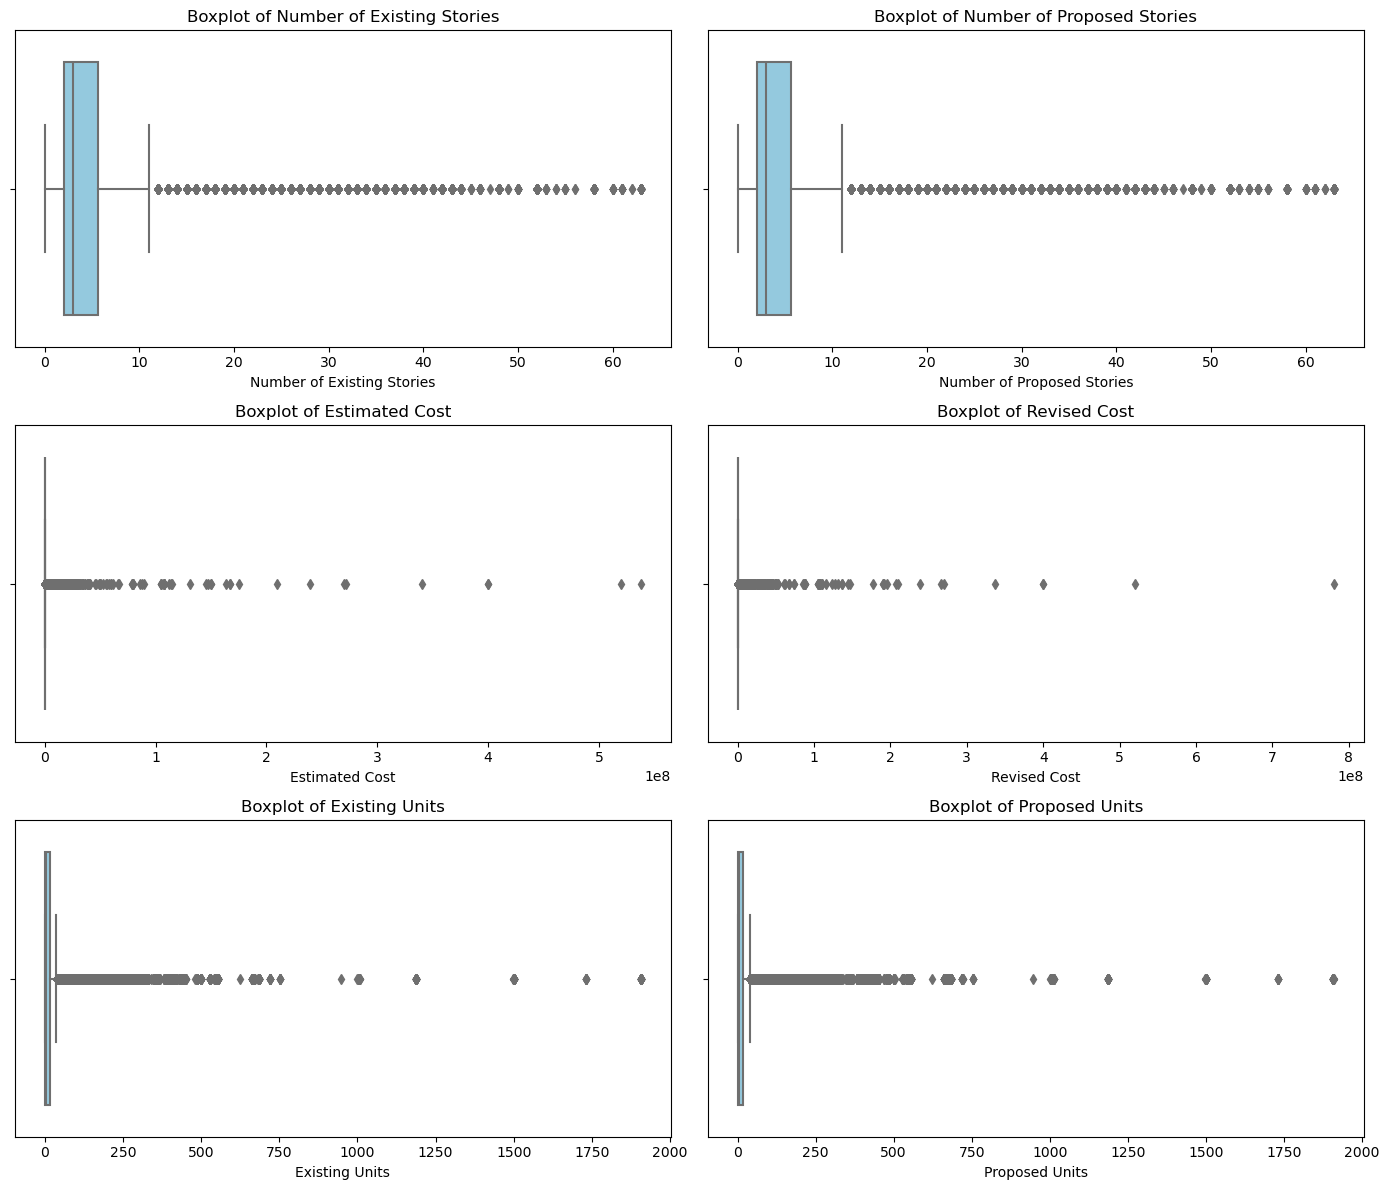

In [113]:
# Create subplots: 3 rows x 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
#Flatten the axes 2D Numpy array to prepare below iteration:
axes = axes.flatten()  

# Loop through each numerical column and corresponding subplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=sf_df_dummies, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

**Step 3** - Inter quartile range:

In [115]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers[[column]]

In [116]:
# Check each column for outliers
for col in numerical_columns:
    outliers = detect_outliers_iqr(sf_df_dummies, col)
    print(f"{col}: {len(outliers)} outliers")
    
    if not outliers.empty:
        print("Top 5 most frequent outlier values:")
        print(outliers[col].value_counts().head(10), "\n")

Number of Existing Stories: 15528 outliers
Top 5 most frequent outlier values:
Number of Existing Stories
12.0    856
25.0    783
16.0    739
38.0    735
22.0    728
14.0    697
23.0    667
17.0    650
20.0    650
26.0    623
Name: count, dtype: int64 

Number of Proposed Stories: 15470 outliers
Top 5 most frequent outlier values:
Number of Proposed Stories
12.0    861
25.0    764
16.0    734
38.0    717
22.0    711
14.0    704
23.0    657
26.0    650
17.0    646
20.0    643
Name: count, dtype: int64 

Estimated Cost: 23777 outliers
Top 5 most frequent outlier values:
Estimated Cost
60000.0     1471
100000.0    1331
80000.0     1034
75000.0      975
150000.0     933
200000.0     723
70000.0      645
65000.0      615
250000.0     511
120000.0     493
Name: count, dtype: int64 

Revised Cost: 23124 outliers
Top 5 most frequent outlier values:
Revised Cost
100000.0    1396
80000.0     1239
150000.0     970
75000.0      871
120000.0     672
200000.0     631
90000.0      590
250000.0     57

In [117]:
outlier_counts = []
total_rows = sf_df_dummies.shape[0]

for col in numerical_columns:
    outliers = detect_outliers_iqr(sf_df_dummies, col)
    num_outliers = len(outliers)
    proportion = round((num_outliers / total_rows) * 100, 2)  # percentage with 2 decimals
    outlier_counts.append((col, num_outliers, proportion))

# Show the result
print(outlier_counts)

[('Number of Existing Stories', 15528, 8.64), ('Number of Proposed Stories', 15470, 8.61), ('Estimated Cost', 23777, 13.24), ('Revised Cost', 23124, 12.87), ('Existing Units', 9602, 5.35), ('Proposed Units', 9884, 5.5)]


**Step 4** - Distribution:

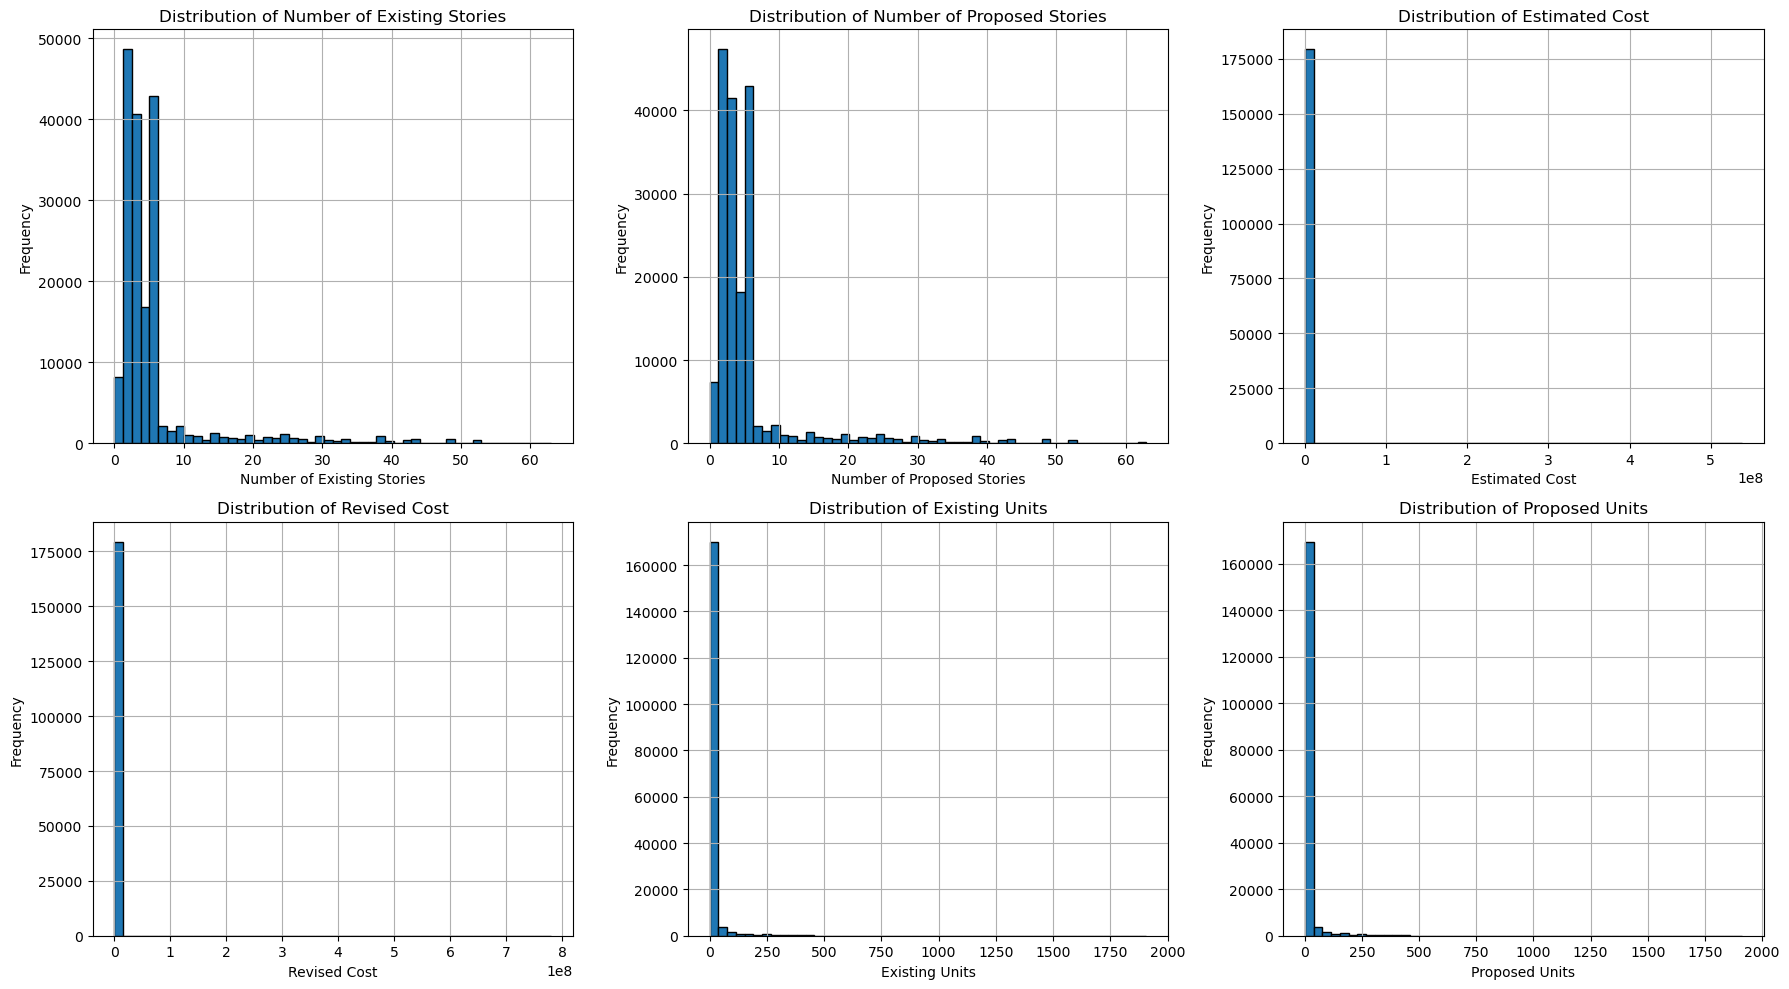

In [119]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numerical_columns):
    axes[i].hist(sf_df_dummies[col].dropna(), bins=50, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

#### The numerical features have a highly skewed distribution due to the presence of outliers, which is not correct for machine learning model processing. 

**Step 5** - Considerations:

The following considerations might be followed in further stage of EDA and data preprocessing:

| Outlier Proportion | Typical Action   | Explanation                                                              |
|--------------------|------------------|---------------------------------------------------------------------------|
| < 1%               | Safe to remove   | Negligible effect on model training and generalization                   |
| 1–5%               | Often removable  | Still acceptable, especially if they are clear anomalies                 |
| 5–15%              | Case-by-case     | Consider alternative handling (e.g., capping, transforming)              |
| > 15%              | Caution!         | Removing this many records may bias the model or reduce generalization   |

In [124]:
for tup in outlier_counts:
    print(f"Feature '{tup[0]}' has {tup[1]} outliers, which is {tup[2]}% of the total feature records.")

Feature 'Number of Existing Stories' has 15528 outliers, which is 8.64% of the total feature records.
Feature 'Number of Proposed Stories' has 15470 outliers, which is 8.61% of the total feature records.
Feature 'Estimated Cost' has 23777 outliers, which is 13.24% of the total feature records.
Feature 'Revised Cost' has 23124 outliers, which is 12.87% of the total feature records.
Feature 'Existing Units' has 9602 outliers, which is 5.35% of the total feature records.
Feature 'Proposed Units' has 9884 outliers, which is 5.5% of the total feature records.


### 2.4.5. Redundant columns:

Some descriptive columns were extracted from the initial dataframe.  
This descriptive dataframe will saved as a distinct .csv file for future use.  
The most important is that "description_df" and "sf_df_dummies" keep aligned for any futher potential needed merge.  

In [127]:
description_df.head(5)

,Permit Type Definition,Existing Construction Type Description,Proposed Construction Type Description
0,sign - erect,constr type 3,wood frame (5)
1,sign - erect,constr type 3,wood frame (5)
3,otc alterations permit,wood frame (5),wood frame (5)
4,demolitions,constr type 3,wood frame (5)
5,otc alterations permit,constr type 1,constr type 1


In [128]:
description_df.shape

(179623, 3)

In [129]:
sf_df_dummies.shape

(179623, 31)

**Save to local Github repository - To be transformed into comments for Springboard submission!**

In [131]:
# Save descriptive dataframe to local Github repository:
#description_df.to_csv(r"C:\Users\Benoit Loze\Desktop\SPRINGBOARD\_CURSUS\18_Data_Wrangling\18_06_Capstone_Two\18.6_capstone_two\data\interim\description_df.csv", index=False)

### 2.4.6. Duplicated rows:

**Finding:**

In the dataset, **no complete duplicated rows** were found. This means there are no rows where all columns are identical — so we do not need to remove any fully repeated entries.

However, we did discover **several partial duplicates**. These are rows that are identical in a subset of important columns — such as `Permit Number`, `Street Name`, `Zipcode`, `Permit Type`, `Proposed Use`, etc. In many cases, the same `Permit Number` appears multiple times with small differences in other fields like `Issued Date`, `Completed Date`, `Current Status`, or `Estimated Cost`.

---

**Reasons for partial duplicates:**

Partial duplicates can occur for several reasons, especially in real-world administrative datasets like building permits:

- **Permit updates**: A permit may be revised over time (e.g., a change in cost, schedule, or scope).
- **Multiple phases**: One permit number might relate to different phases of a project, each recorded separately.
- **Data entry inconsistencies**: Slight variations in status, dates, or descriptions may come from manual updates or parallel systems.
- **Amendments or corrections**: Some permits may have been amended, resubmitted, or corrected, resulting in overlapping records.

---

**Strategy:**

At this **Data Wrangling** stage, we are **not making any deletions or assumptions**. Instead, we are **flagging these partial duplicates** and keeping them in mind for further investigation.

We will revisit them during:

- **Exploratory Data Analysis (EDA)** – to better understand their nature and distribution.
- **Data Preprocessing** – to decide whether we need to merge them, keep the most recent one, or derive features from them.derive features from them.

### 2.4.7. Ranges:

Several features have been identified as potenitally to be summarized into ranges, which could help to understand the data distribution.  
 - Estimated Cost.  
 - Number of Existing Stories.  
 - Number of proposed Stories.  
 - Existing Units.  
 - Proposed Units.   
 - Zipcode. 

**Step1** - Ranges creations:

Estimated Cost:

In [138]:
cost_bins = [0, 10_000, 100_000, 500_000, 1_000_000, 5_000_000, np.inf]
cost_labels = ['<10k', '10k–100k', '100k–500k', '500k–1M', '1M–5M', '>5M']

sf_df_dummies['Estimated Cost Range'] = pd.cut(sf_df_dummies['Estimated Cost'], bins=cost_bins, labels=cost_labels)

Number of Existing Stories & Number of Proposed Stories:

In [140]:
story_bins = [0, 1, 3, 6, 10, 20, np.inf]
story_labels = ['1 story', '2–3 stories', '4–6', '7–10', '11–20', '21+']

sf_df_dummies['Existing Stories Range'] = pd.cut(sf_df_dummies['Number of Existing Stories'], bins=story_bins, labels=story_labels)
sf_df_dummies['Proposed Stories Range'] = pd.cut(sf_df_dummies['Number of Proposed Stories'], bins=story_bins, labels=story_labels)

Number of Existing Units & Number of Proposed Units:

In [142]:
unit_bins = [0, 1, 4, 10, 50, 200, np.inf]
unit_labels = ['0', '1–4', '5–10', '11–50', '51–200', '200+']

sf_df_dummies['Existing Units Range'] = pd.cut(sf_df_dummies['Existing Units'], bins=unit_bins, labels=unit_labels)
sf_df_dummies['Proposed Units Range'] = pd.cut(sf_df_dummies['Proposed Units'], bins=unit_bins, labels=unit_labels)

Filed Date:

In [144]:
# # Binning into decades:

# # Define bins and labels
# year_bins = [1990, 2000, 2010, 2020, 2025]
# year_labels = ['1990s', '2000s', '2010s', '2020+']

# # Bin the year extracted from 'Filed Date' directly
# sf_df_dummies['Filed Decade'] = pd.cut(sf_df_dummies['Filed Date'].dt.year, bins=year_bins, labels=year_labels)

**pd.cut() will not be used on "Zipcode" feature.**   
**Instead, we will group it in further stage by mapping it neighborhoods, districts, etc.**  

**Step 3** - Control:

In [147]:
sf_df_dummies_info = pd.DataFrame({
    'column': sf_df_dummies.columns,
    'non_null_count': sf_df_dummies.notnull().sum().values,
    'null_count': sf_df_dummies.isnull().sum().values,
    'dtype': sf_df_dummies.dtypes.values
})

sf_df_dummies_info

,column,non_null_count,null_count,dtype
0,Permit Number,179623,0,object
1,Permit Type,179623,0,category
2,Permit Creation Date,179623,0,datetime64[ns]
3,Block,179623,0,object
4,Lot,179623,0,object
5,Street Number,179623,0,int64
6,Street Name,179623,0,object
7,Street Suffix,179623,0,category
8,Description,179623,0,object
9,Current Status,179623,0,category


In [148]:
ranges = ['Estimated Cost Range', 
          'Existing Stories Range', 
          'Proposed Stories Range', 
          'Existing Units Range', 
          'Proposed Units Range', 
         ]

In [149]:
for col in ranges:
    print(f"\nValue counts for '{col}':")
    print(sf_df_dummies[col].value_counts(dropna=False))


Value counts for 'Estimated Cost Range':
Estimated Cost Range
10k–100k     93566
<10k         72718
100k–500k     9623
500k–1M       1739
1M–5M         1671
>5M            306
Name: count, dtype: int64

Value counts for 'Existing Stories Range':
Existing Stories Range
2–3 stories    89326
4–6            59701
21+            10040
1 story         7837
11–20           6532
7–10            5789
NaN              398
Name: count, dtype: int64

Value counts for 'Proposed Stories Range':
Proposed Stories Range
2–3 stories    88864
4–6            61171
21+             9999
1 story         7188
11–20           6516
7–10            5742
NaN              143
Name: count, dtype: int64

Value counts for 'Existing Units Range':
Existing Units Range
11–50     58708
0         43741
1–4       32921
NaN       25683
5–10      10786
51–200     5461
200+       2323
Name: count, dtype: int64

Value counts for 'Proposed Units Range':
Proposed Units Range
11–50     58513
0         43625
1–4       34365
NaN  

**Step 4** - Hot encoding:

Once binned range columns are categorical.  
It will prepare the data for machine learning models.  
drop_first=True: removes the first category in each column to avoid multicollinearity for ML models.

In [152]:
# sf_df_encoded = pd.get_dummies(sf_df_dummies, columns=ranges, drop_first=True)

In [153]:
# sf_df_encoded_info = pd.DataFrame({
#     'column': sf_df_encoded.columns,
#     'non_null_count': sf_df_encoded.notnull().sum().values,
#     'null_count': sf_df_encoded.isnull().sum().values,
#     'dtype': sf_df_encoded.dtypes.values
# })

# sf_df_encoded_info

### Hot encoding to be reserved for further stage!!

### 2.4.8. Save dataframe to .csv:

**Save to local Github repository - To be transformed into comments for Springboard submission!**

In [157]:
sf_df_not_encoded = sf_df_dummies

In [158]:
#sf_df_encoded.to_csv(r"C:\Users\Benoit Loze\Desktop\SPRINGBOARD\_CURSUS\18_Data_Wrangling\18_06_Capstone_Two\18.6_capstone_two\data\interim\sf_df_encoded.csv", index=False)

In [159]:
#sf_df_not_encoded.to_csv(r"C:\Users\Benoit Loze\Desktop\SPRINGBOARD\_CURSUS\18_Data_Wrangling\18_06_Capstone_Two\18.6_capstone_two\data\interim\sf_df_not_encoded.csv", index=False)

In [160]:
# minimumd_date = sf_df_encoded["Filed Date"].min()
# minimumd_date

In [161]:
# minimumd_date = sf_df_encoded["Filed Date"].max()
# minimumd_date